In [1]:
import os
import torch
import matplotlib.pyplot as plt

from typing import List, Tuple, Dict, Any

In [2]:
MODELS_DIR = "models"
METRICS_DIR = "metrics"

In [3]:
all_models = os.listdir(MODELS_DIR)

In [4]:
all_completed_models = [model for model in all_models if model.startswith("completed")]

In [5]:
print(all_completed_models)
all_completed_models = [model.split("completed_")[-1] for model in all_completed_models]
print(all_completed_models)

['completed_dino_random_bottom_1_iterations_B50.pth', 'completed_dino_random_bottom_2_iterations_B50.pth', 'completed_dino_random_bottom_3_iterations_B50.pth', 'completed_dino_random_bottom_4_iterations_B50.pth', 'completed_dino_random_bottom_5_iterations_B50.pth', 'completed_dino_random_bottom_6_iterations_B50.pth', 'completed_dino_random_top_1_iterations_B10.pth', 'completed_dino_random_top_2_iterations_B10.pth', 'completed_dino_random_top_3_iterations_B10.pth', 'completed_dino_random_top_4_iterations_B10.pth', 'completed_dino_random_top_5_iterations_B10.pth', 'completed_dino_random_top_6_iterations_B10.pth', 'completed_dino_typiclust_bottom_1_iterations_B50.pth', 'completed_dino_typiclust_bottom_2_iterations_B50.pth', 'completed_dino_typiclust_bottom_3_iterations_B50.pth', 'completed_dino_typiclust_bottom_4_iterations_B50.pth', 'completed_dino_typiclust_bottom_5_iterations_B50.pth', 'completed_dino_typiclust_bottom_6_iterations_B50.pth', 'completed_dino_typiclust_top_1_iterations_B1

In [6]:
models_random_dino = [model for model in all_completed_models if model.startswith("dino_random")]
models_typiclust_dino = [model for model in all_completed_models if model.startswith("dino_typiclust")]
models_random_simclr = [model for model in all_completed_models if model.startswith("simclr_random")]
models_typiclust_simclr = [model for model in all_completed_models if model.startswith("simclr_typiclust")]

In [7]:
print(models_random_dino)
print(models_typiclust_dino)

['dino_random_bottom_1_iterations_B50.pth', 'dino_random_bottom_2_iterations_B50.pth', 'dino_random_bottom_3_iterations_B50.pth', 'dino_random_bottom_4_iterations_B50.pth', 'dino_random_bottom_5_iterations_B50.pth', 'dino_random_bottom_6_iterations_B50.pth', 'dino_random_top_1_iterations_B10.pth', 'dino_random_top_2_iterations_B10.pth', 'dino_random_top_3_iterations_B10.pth', 'dino_random_top_4_iterations_B10.pth', 'dino_random_top_5_iterations_B10.pth', 'dino_random_top_6_iterations_B10.pth']
['dino_typiclust_bottom_1_iterations_B50.pth', 'dino_typiclust_bottom_2_iterations_B50.pth', 'dino_typiclust_bottom_3_iterations_B50.pth', 'dino_typiclust_bottom_4_iterations_B50.pth', 'dino_typiclust_bottom_5_iterations_B50.pth', 'dino_typiclust_bottom_6_iterations_B50.pth', 'dino_typiclust_top_1_iterations_B10.pth', 'dino_typiclust_top_2_iterations_B10.pth', 'dino_typiclust_top_3_iterations_B10.pth', 'dino_typiclust_top_4_iterations_B10.pth', 'dino_typiclust_top_5_iterations_B10.pth', 'dino_typ

In [8]:
all_random_models = {model: torch.load(f"{MODELS_DIR}/completed_{model}", weights_only=False) for model in models_random_dino}
all_typiclust_models = {model: torch.load(f"{MODELS_DIR}/completed_{model}", weights_only=False) for model in models_typiclust_dino}

In [9]:
print(all_random_models)

{'dino_random_bottom_1_iterations_B50.pth': {'model': OrderedDict([('conv1.weight', tensor([[[[ 2.6097e-01,  2.2672e-01,  2.5978e-01,  ...,  5.1820e-01,
            4.7885e-01,  3.6962e-01],
          [ 5.1579e-01,  4.8306e-01,  4.0678e-01,  ...,  2.5047e-01,
            3.5744e-01,  4.2128e-01],
          [ 4.5148e-01,  4.6966e-01,  6.8495e-01,  ...,  9.3707e-01,
            6.4620e-01,  4.0266e-01],
          ...,
          [ 5.3216e-01,  6.0095e-01,  6.6392e-01,  ...,  1.7364e-01,
            1.8711e-01,  3.8695e-01],
          [ 5.2634e-01,  6.5987e-01,  6.6810e-01,  ...,  9.5277e-01,
            1.0184e+00,  7.8503e-01],
          [ 5.3383e-01,  6.3281e-01,  5.3932e-01,  ...,  4.2496e-01,
            5.3921e-01,  6.2211e-01]],

         [[ 2.1582e-01,  1.0618e-01,  1.0202e-01,  ...,  3.2279e-01,
            3.1932e-01,  2.4835e-01],
          [ 4.5948e-01,  3.6747e-01,  2.5231e-01,  ...,  5.3913e-02,
            2.5793e-01,  3.7479e-01],
          [ 3.7667e-01,  4.1066e-01,  6.741

In [10]:
def extract_accuracies(models:Dict[str, Dict[str, Any]]):
    accuracies = []
    cumulative_samples = []

    for model in models:
        strings = model.split("_")
        print(strings)
        num_iterations = int(strings[3])
        budget_size = int(strings[-1].split(".")[0].split("B")[-1]) # B10.pth -> 10
        print(budget_size)

        metrics =  models[model]["metrics"]
        accuracy = metrics["total_accuracy"]

        n_cumulative_samples = num_iterations * budget_size

        cumulative_samples.append(n_cumulative_samples)
        accuracies.append(accuracy)
    return accuracies, cumulative_samples

In [11]:
tops = []
bottoms = []

for models in [all_random_models, all_typiclust_models]:
    bottom_models = {model: models[model] for model in models if "bottom" in model}
    top_models = {model: models[model] for model in models if "top" in model}

    accuracies, cumulative_samples = extract_accuracies(models=top_models)
    
    # Extract model name for plotting
    keys = list(top_models.keys())
    if keys[0].startswith("dino_typiclust") or keys[0].startswith("simclr_typiclust"):
        model_name = "Typiclust"
    else:
        model_name = "Random"

    # Extract accuracies and cumulative samples for the "top" and "bottom" models
    accuracies, cumulative_samples = extract_accuracies(models=top_models)
    tops.append({"accuracies": accuracies, "cumulative_samples": cumulative_samples, "model_name": model_name})
    print(cumulative_samples)

    accuracies, cumulative_samples = extract_accuracies(models=bottom_models)
    bottoms.append({"accuracies": accuracies, "cumulative_samples": cumulative_samples, "model_name": model_name})
    print(cumulative_samples)


['dino', 'random', 'top', '1', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '2', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '3', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '4', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '5', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '6', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '1', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '2', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '3', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '4', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '5', 'iterations', 'B10.pth']
10
['dino', 'random', 'top', '6', 'iterations', 'B10.pth']
10
[10, 20, 30, 40, 50, 60]
['dino', 'random', 'bottom', '1', 'iterations', 'B50.pth']
50
['dino', 'random', 'bottom', '2', 'iterations', 'B50.pth']
50
['dino', 'random', 'bottom', '3', 'iterations', 'B50.pth']
50
['dino', 'random', 'bottom', '4', 'iterations', 'B50.pth']
50
['dino', 'random', 

In [12]:
print(tops)
print(bottoms)

[{'accuracies': [0.1425, 0.1514, 0.1202, 0.14, 0.1843, 0.1716], 'cumulative_samples': [10, 20, 30, 40, 50, 60], 'model_name': 'Random'}, {'accuracies': [0.1451, 0.1101, 0.1474, 0.1791, 0.156, 0.1232], 'cumulative_samples': [10, 20, 30, 40, 50, 60], 'model_name': 'Typiclust'}]
[{'accuracies': [0.1352, 0.1807, 0.1922, 0.1976, 0.1504, 0.1753], 'cumulative_samples': [50, 100, 150, 200, 250, 300], 'model_name': 'Random'}, {'accuracies': [0.1103, 0.1712, 0.1681, 0.1997, 0.1486, 0.1959], 'cumulative_samples': [50, 100, 150, 200, 250, 300], 'model_name': 'Typiclust'}]


In [13]:
def plot_accuracy_on_samples(data):
    for i, entry in enumerate(data):
        plt.plot(entry["cumulative_samples"], entry["accuracies"], label=entry["model_name"])
    
    plt.xlabel("Cumulative samples")
    plt.ylabel("Accuracy")
    plt.title("Accuracy on cumulative samples")
    plt.legend()
    plt.show()

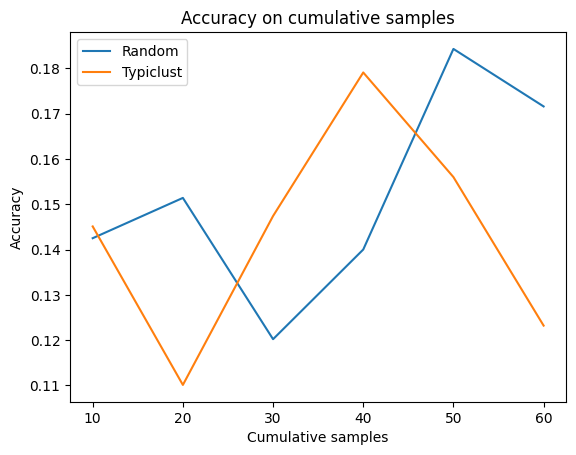

In [14]:
plot_accuracy_on_samples(tops)

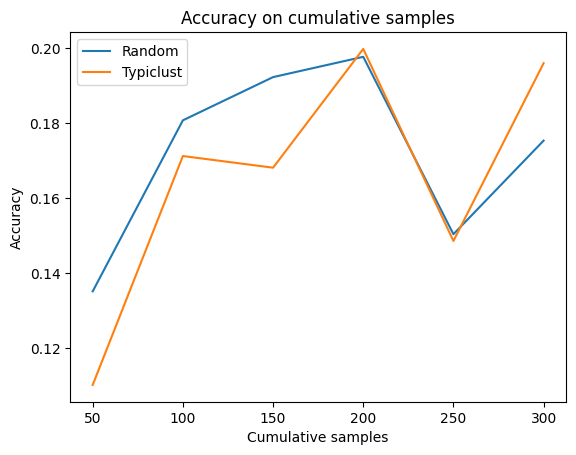

In [15]:
plot_accuracy_on_samples(bottoms)